In [127]:
from methods.bisection import *
from methods.fixed_point import *
from methods.newton_raphson import *
from methods.newton_raphson_modified import *
from methods.secant import *

In [128]:
from math import log

def order_of_convergence(x3, x2, x1, x0):
    num = log(abs((x0 - x1) / (x1 - x2)))
    den = log(abs((x1 - x2) / (x2 - x3)))
    return num / den


def windows(arr, window_size):
    for i in range(len(arr) - window_size + 1):
        yield tuple(arr[i:i + window_size])

def ocs(table):
    return [
        order_of_convergence(s3[1], s2[1], s1[1], s0[1])
        for s3, s2, s1, s0 in windows(table, 4)
    ]

In [129]:
from math import sin, cos

f =   lambda x: 0.2 * (x - 1) ** 2 + sin(x - 1)
df =  lambda x: 0.2 * (5 * cos(x - 1) + 2 * x - 2)
d2f = lambda x: 0.2 * (-5 * sin(x - 1) + 2)

bis = bisection(f, -1, 5, 10e-3)
fip = fixed_point(f, 7.1, 0)
n_r = newton_raphson(f, df, 7, 0)
nrm = newton_raphson_modified(f, df, d2f, 8, 10e-8)
sec = secant(f, 4, 7, 0)

lens = [len(bis), len(fip), len(n_r), len(nrm), len(sec)]
min_len = min(lens)

bis = bis[len(bis) - min_len:]
fip = fip[len(fip) - min_len:]
n_r = n_r[len(n_r) - min_len:]
nrm = nrm[len(nrm) - min_len:]
sec = sec[len(sec) - min_len:]

lens

[8, 8, 8, 8, 8]

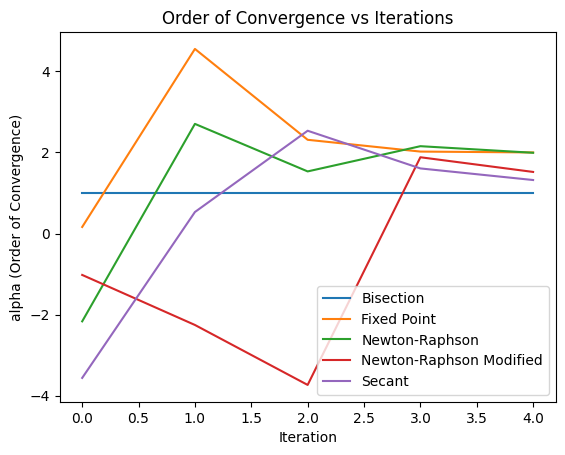

In [130]:
import matplotlib.pyplot as plt

plt.plot(ocs(bis), label="Bisection")
plt.plot(ocs(fip), label="Fixed Point")
plt.plot(ocs(n_r), label="Newton-Raphson")
plt.plot(ocs(nrm), label="Newton-Raphson Modified")
plt.plot(ocs(sec), label="Secant")

plt.title("Order of Convergence vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("alpha (Order of Convergence)")
plt.legend()
plt.show()